In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 300

## 1. The Data

In [5]:
data = pd.read_excel('./data/data.xlsx')
data = data.drop(columns=['S/N'])
data.head()

,cDen,Pot,Sn %,pH,C2H4,CO,H2,EtoH,Formate
0,150,3.5,100,14.05,0.0,23.0,12.0,0.0,61.0
1,150,3.3,80,14.05,0.0,23.0,7.0,0.0,66.0
2,150,3.2,50,14.05,0.0,34.0,5.0,3.0,52.0
3,150,3.1,10,14.05,1.0,42.0,5.0,2.0,42.0
4,150,3.0,5,14.05,4.0,48.0,5.0,10.0,19.0


In [6]:
data.to_csv('./data/cleaned_data.csv', index=False)

In [7]:
describe = data.describe().transpose()[['mean', 'std', 'min', 'max']]
describe

,mean,std,min,max
cDen,254.000000,106.266511,141.000000,450.000000
Pot,4.022000,0.566151,2.800000,5.100000
Sn %,25.600000,35.734851,0.000000,100.000000
pH,11.396800,3.023602,8.020000,14.050000
C2H4,11.231549,11.613583,0.000000,37.000000
CO,21.230892,12.486621,4.011617,50.000000
H2,16.977874,12.497202,5.000000,54.178701
EtoH,9.513963,9.766198,0.000000,48.000000
Formate,28.321640,21.683757,1.774228,70.000000


In [8]:
describe.to_excel('./data/summary_data.xlsx')

In [9]:
features_col = list(data.columns[:4])
target_col = list(data.columns[4:])
print('Features: ', features_col)
print('Target: ', target_col)

Features:  ['cDen', 'Pot', 'Sn %', 'pH']
Target:  ['C2H4', 'CO', 'H2', 'EtoH', 'Formate']


In [10]:
data[features_col[2]] = data[features_col[2]] / 100
data.head(2)

,cDen,Pot,Sn %,pH,C2H4,CO,H2,EtoH,Formate
0,150,3.5,1.0,14.05,0.0,23.0,12.0,0.0,61.0
1,150,3.3,0.8,14.05,0.0,23.0,7.0,0.0,66.0


In [11]:
from src.utils import get_weight

In [12]:
data['weight'] = data['Sn %'].apply(get_weight)
data['Cu %'] = 1 - data['Sn %']
data.head(5)

,cDen,Pot,Sn %,pH,C2H4,CO,H2,EtoH,Formate,weight,Cu %
0,150,3.5,1.00,14.05,0.0,23.0,12.0,0.0,61.0,118.7100,0.00
1,150,3.3,0.80,14.05,0.0,23.0,7.0,0.0,66.0,107.6772,0.20
2,150,3.2,0.50,14.05,0.0,34.0,5.0,3.0,52.0,91.1280,0.50
3,150,3.1,0.10,14.05,1.0,42.0,5.0,2.0,42.0,69.0624,0.90
4,150,3.0,0.05,14.05,4.0,48.0,5.0,10.0,19.0,66.3042,0.95


In [13]:
features_col += ['weight', 'Cu %']

In [14]:
# reassign the features and target columns
data = data[features_col + target_col]
data.head(2)

,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,Formate
0,150,3.5,1.0,14.05,118.7100,0.0,0.0,23.0,12.0,0.0,61.0
1,150,3.3,0.8,14.05,107.6772,0.2,0.0,23.0,7.0,0.0,66.0


In [15]:
normalize_features = False
normalize_target = True

In [16]:
if not normalize_target:
    data.to_csv('./data/cleaned_data.csv', index=False)
else: # normalize target
    data[target_col] = data[target_col] / 100
    if normalize_features:
        data[features_col] = data[features_col] / data[features_col].max()
        data.to_csv('./data/cleaned_data_normalize_feature_target.csv', index=False)
    else:
        data.to_csv('./data/cleaned_data_normalized_target.csv', index=False)

## 2. Analyze Data

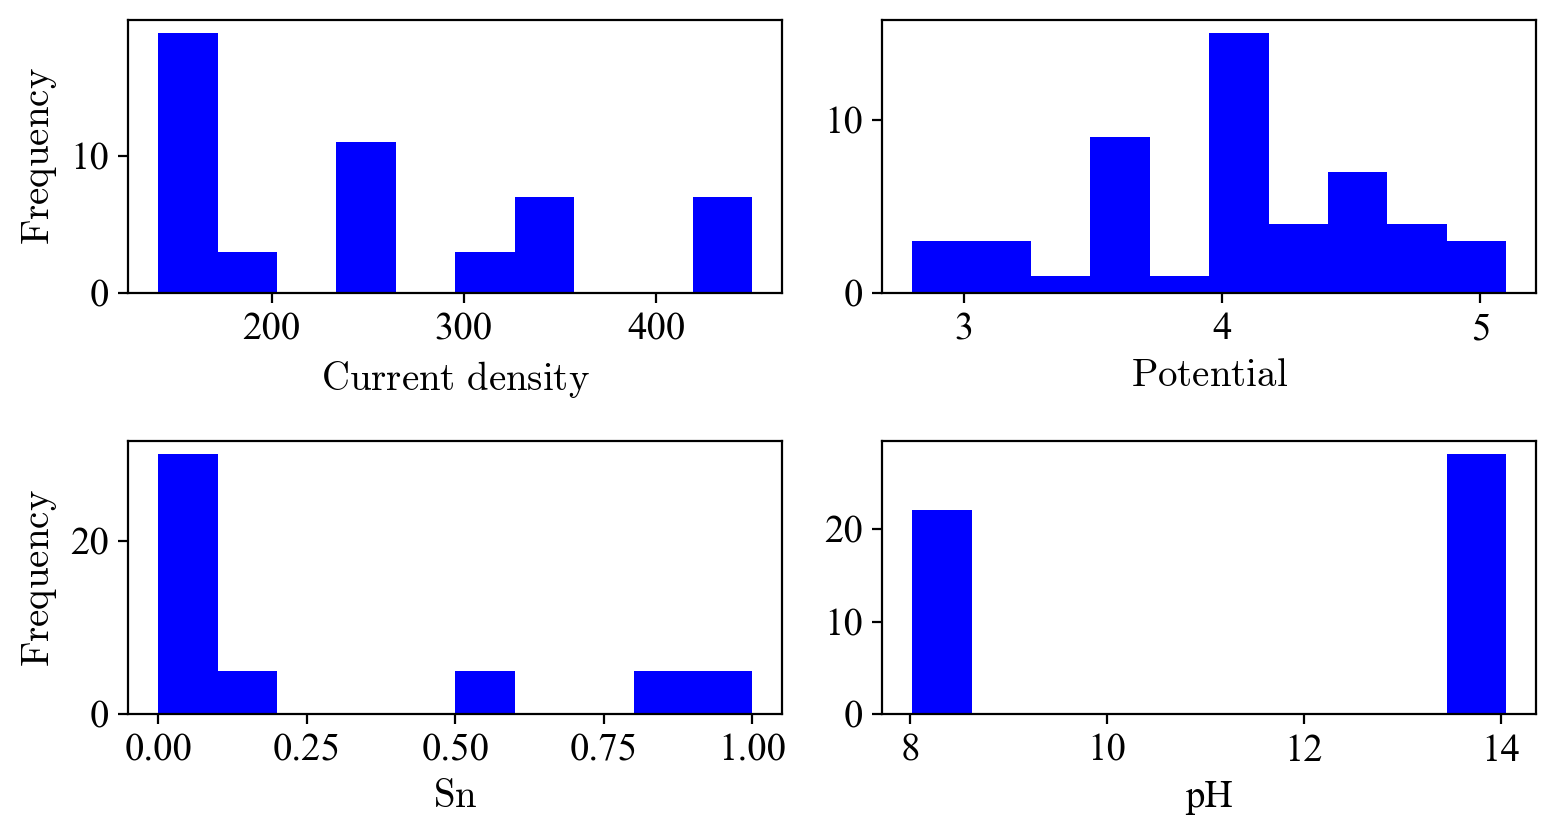

In [17]:
# show histogram for all features with subplots
plt.figure(figsize=(8, 6), dpi=200)
for i, feature in enumerate(features_col[:-2]):
    plt.subplot(3, 2, i+1)
    k = plt.hist(data[feature], bins=10, color='blue')
    if feature == 'Sn %':
        feature = r'$\rm Sn$'
    if feature == 'Cu %':
        feature = r'$\rm Cu$'
    if feature == 'weight':
        feature = r'$\rm Weight$'
    if feature == 'cDen':
        feature = r'$\rm Current \ density$'
    if feature == 'Pot':
        feature = r'$\rm Potential$'
    plt.xlabel(feature)
    
    if i%2 == 0:
        plt.ylabel(r'$\rm Frequency$')
plt.tight_layout()

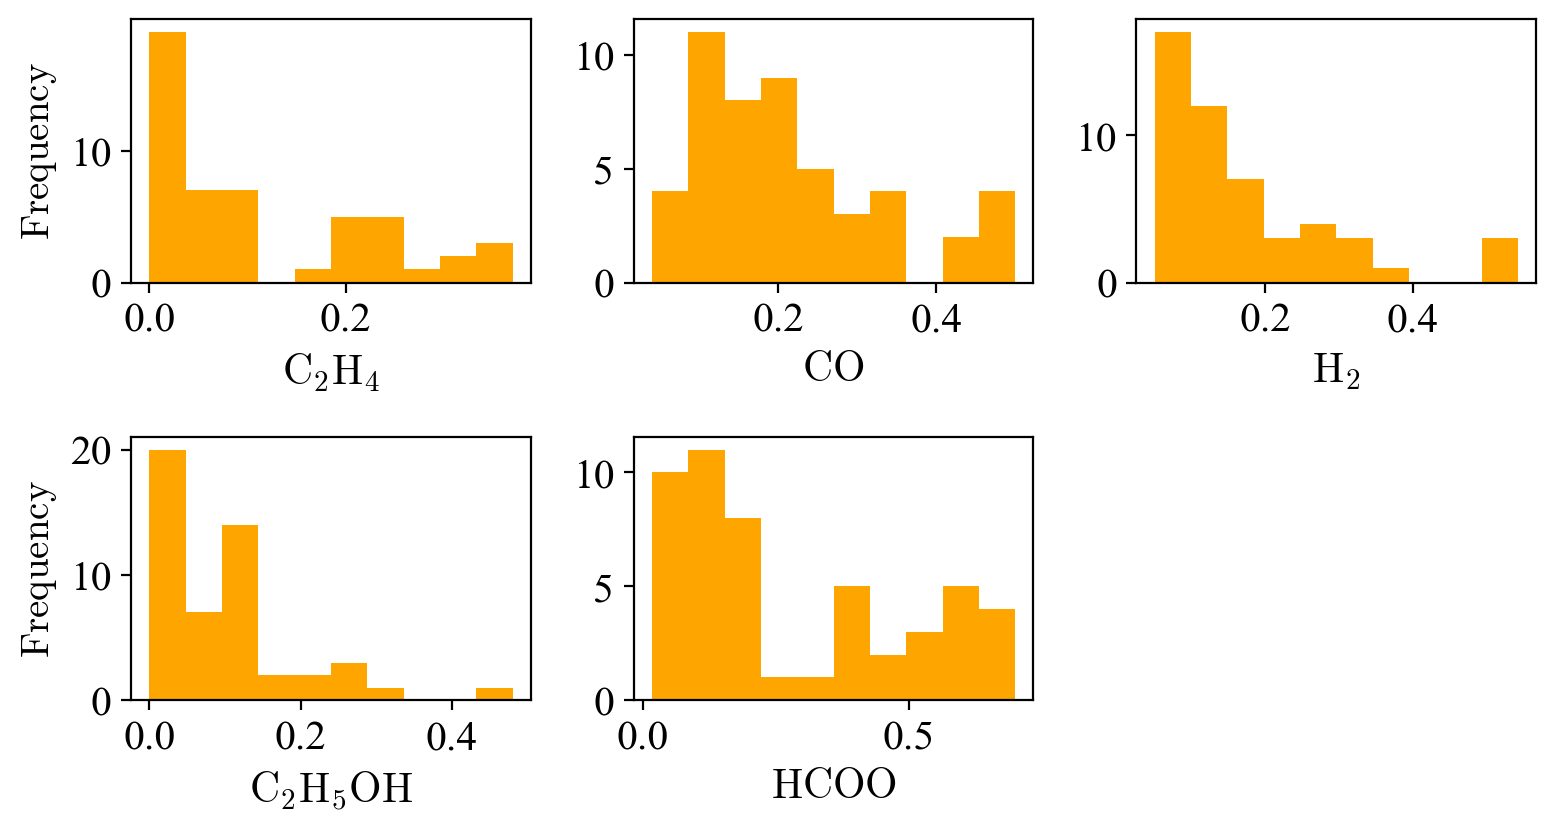

In [18]:
# show histogram for all features with subplots
plt.figure(figsize=(8, 8), dpi=200)
for i, feature in enumerate(target_col):
    plt.subplot(4, 3, i+1)
    k = plt.hist(data[feature], bins=10, color='orange')
    if feature == 'C2H4':
        feature = r'$\rm C_2H_4$'
    if feature == 'CO':
        feature = r'$\rm CO$'
    if feature == 'H2':
        feature = r'$\rm H_2$'
    if feature == 'EtoH':
        feature = r'$\rm C_2H_5OH$'
    if feature == 'Formate':
        feature = r'$\rm HCOO$'
    plt.xlabel(feature, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    if i%3 == 0:
        plt.ylabel(r'$\rm Frequency$')
plt.tight_layout()

## 3. Feature Importance

In [19]:
correlation = data.corr(method='pearson')

In [20]:
correlation.columns

Index(['cDen', 'Pot', 'Sn %', 'pH', 'weight', 'Cu %', 'C2H4', 'CO', 'H2',
       'EtoH', 'Formate'],
      dtype='object')

In [21]:
all_columns = [r'$\rm Current \ density$', 
                r'$\rm Potential$', 
                r'$\rm Sn$', 
                r'$\rm pH$', 
                r'$\rm Weight$', 
                r'$\rm Cu$', 
                r'$\rm C_2H_4$', 
                r'$\rm CO$', 
                r'$\rm H_2$', 
                r'$\rm C_2H_5OH$', 
                r'$\rm HCOO$']
correlation.index = all_columns
correlation.columns = all_columns

In [22]:
from src.utils import plot_heat_map

In [26]:
correlation

,$\rm Current \ density$,$\rm Potential$,$\rm Sn$,$\rm pH$,$\rm Weight$,$\rm Cu$,$\rm C_2H_4$,$\rm CO$,$\rm H_2$,$\rm C_2H_5OH$,$\rm HCOO$
$\rm Current \ density$,1.000000,0.524291,0.087981,0.493306,0.087981,-0.087981,-0.246457,-0.435796,0.483639,0.101766,-0.023990
$\rm Potential$,0.524291,1.000000,-0.004499,-0.396542,-0.004499,0.004499,-0.032742,-0.763131,0.768207,0.025435,-0.175884
$\rm Sn$,0.087981,-0.004499,1.000000,0.313439,1.000000,-1.000000,-0.629903,0.030842,-0.097141,-0.585315,0.865646
$\rm pH$,0.493306,-0.396542,0.313439,1.000000,0.313439,-0.313439,-0.488824,0.353771,-0.274806,-0.072476,0.377264
$\rm Weight$,0.087981,-0.004499,1.000000,0.313439,1.000000,-1.000000,-0.629903,0.030842,-0.097141,-0.585315,0.865646
$\rm Cu$,-0.087981,0.004499,-1.000000,-0.313439,-1.000000,1.000000,0.629903,-0.030842,0.097141,0.585315,-0.865646
$\rm C_2H_4$,-0.246457,-0.032742,-0.629903,-0.488824,-0.629903,0.629903,1.000000,-0.222485,-0.001193,0.412617,-0.699885
$\rm CO$,-0.435796,-0.763131,0.030842,0.353771,0.030842,-0.030842,-0.222485,1.000000,-0.632541,-0.250182,0.209012
$\rm H_2$,0.483639,0.768207,-0.097141,-0.274806,-0.097141,0.097141,-0.001193,-0.632541,1.000000,-0.162082,-0.356715
$\rm C_2H_5OH$,0.101766,0.025435,-0.585315,-0.072476,-0.585315,0.585315,0.412617,-0.250182,-0.162082,1.000000,-0.583443


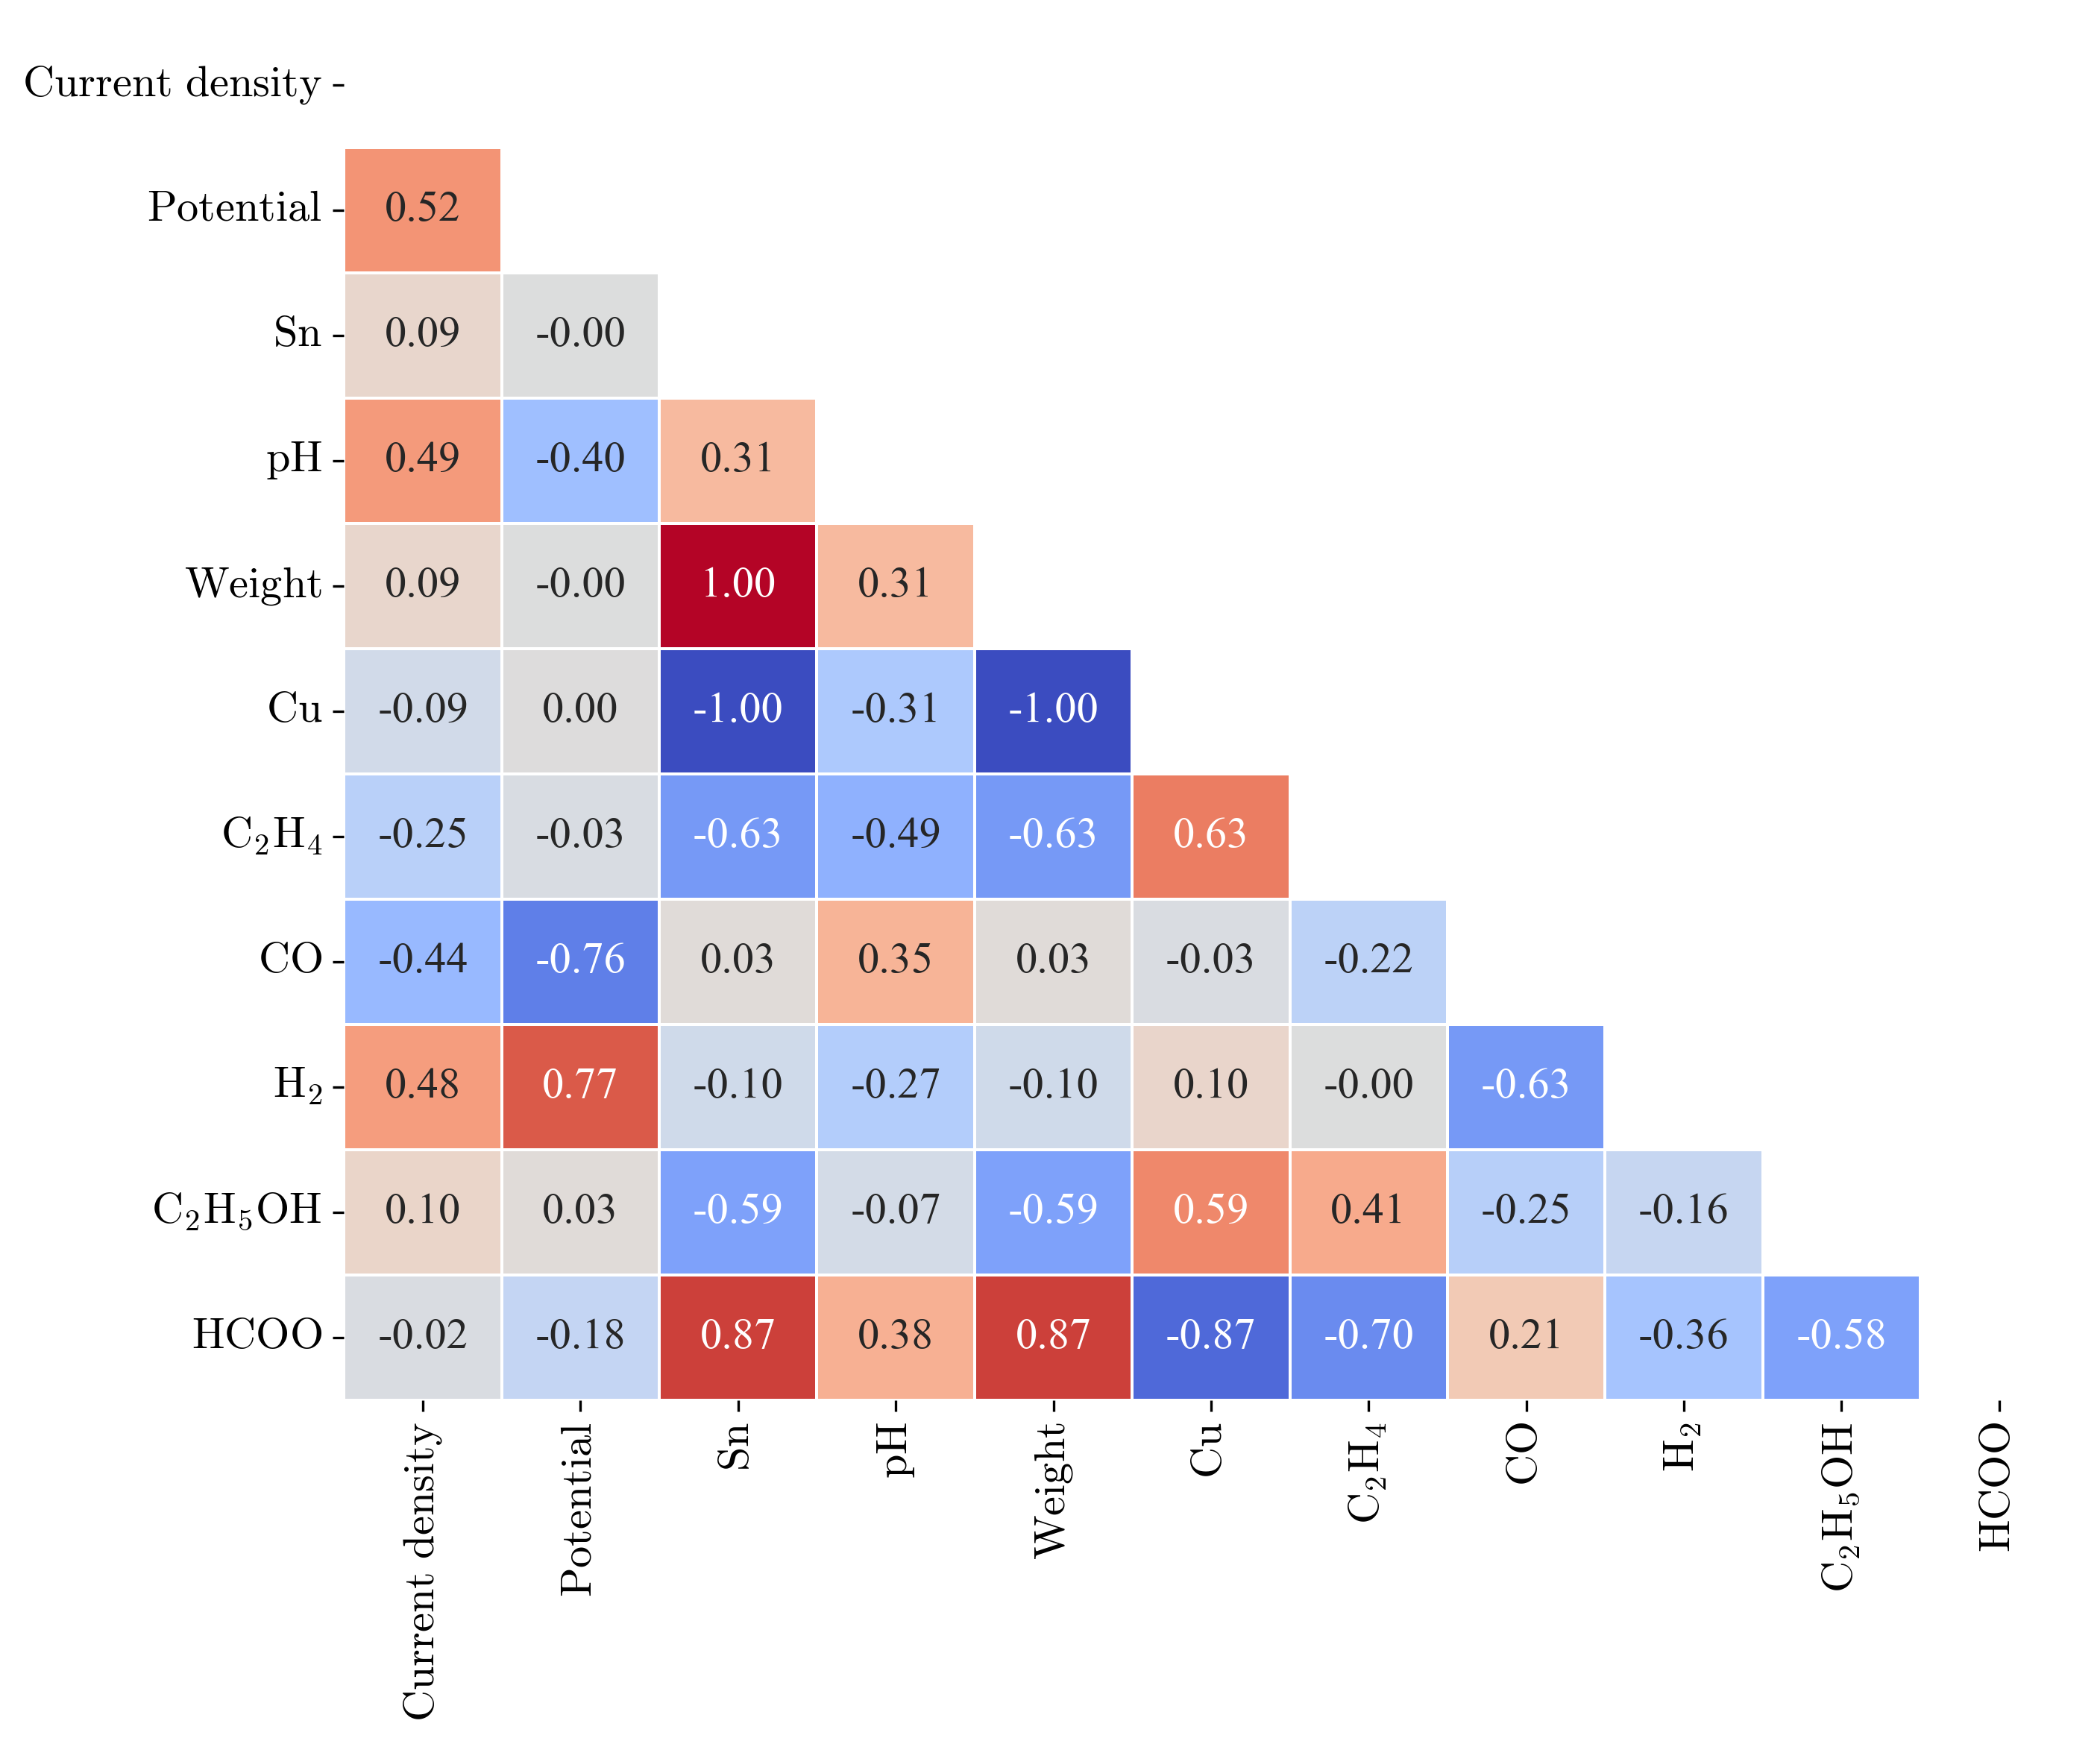

In [35]:
# plot_heat_map(data = correlation, compute_corr = False, fig_size = (10, 5), mask=False, save_fig=False, name='general_no_mask')
plot_heat_map(data = correlation, compute_corr = False, fig_size = (10, 8), mask=True, save_fig=False, name='general_mask')

In [24]:
# get the correlation of the target columns with the features
correlation_target = correlation.iloc[6:, :6]
correlation_target

,$\rm Current \ density$,$\rm Potential$,$\rm Sn$,$\rm pH$,$\rm Weight$,$\rm Cu$
$\rm C_2H_4$,-0.246457,-0.032742,-0.629903,-0.488824,-0.629903,0.629903
$\rm CO$,-0.435796,-0.763131,0.030842,0.353771,0.030842,-0.030842
$\rm H_2$,0.483639,0.768207,-0.097141,-0.274806,-0.097141,0.097141
$\rm C_2H_5OH$,0.101766,0.025435,-0.585315,-0.072476,-0.585315,0.585315
$\rm HCOO$,-0.023990,-0.175884,0.865646,0.377264,0.865646,-0.865646


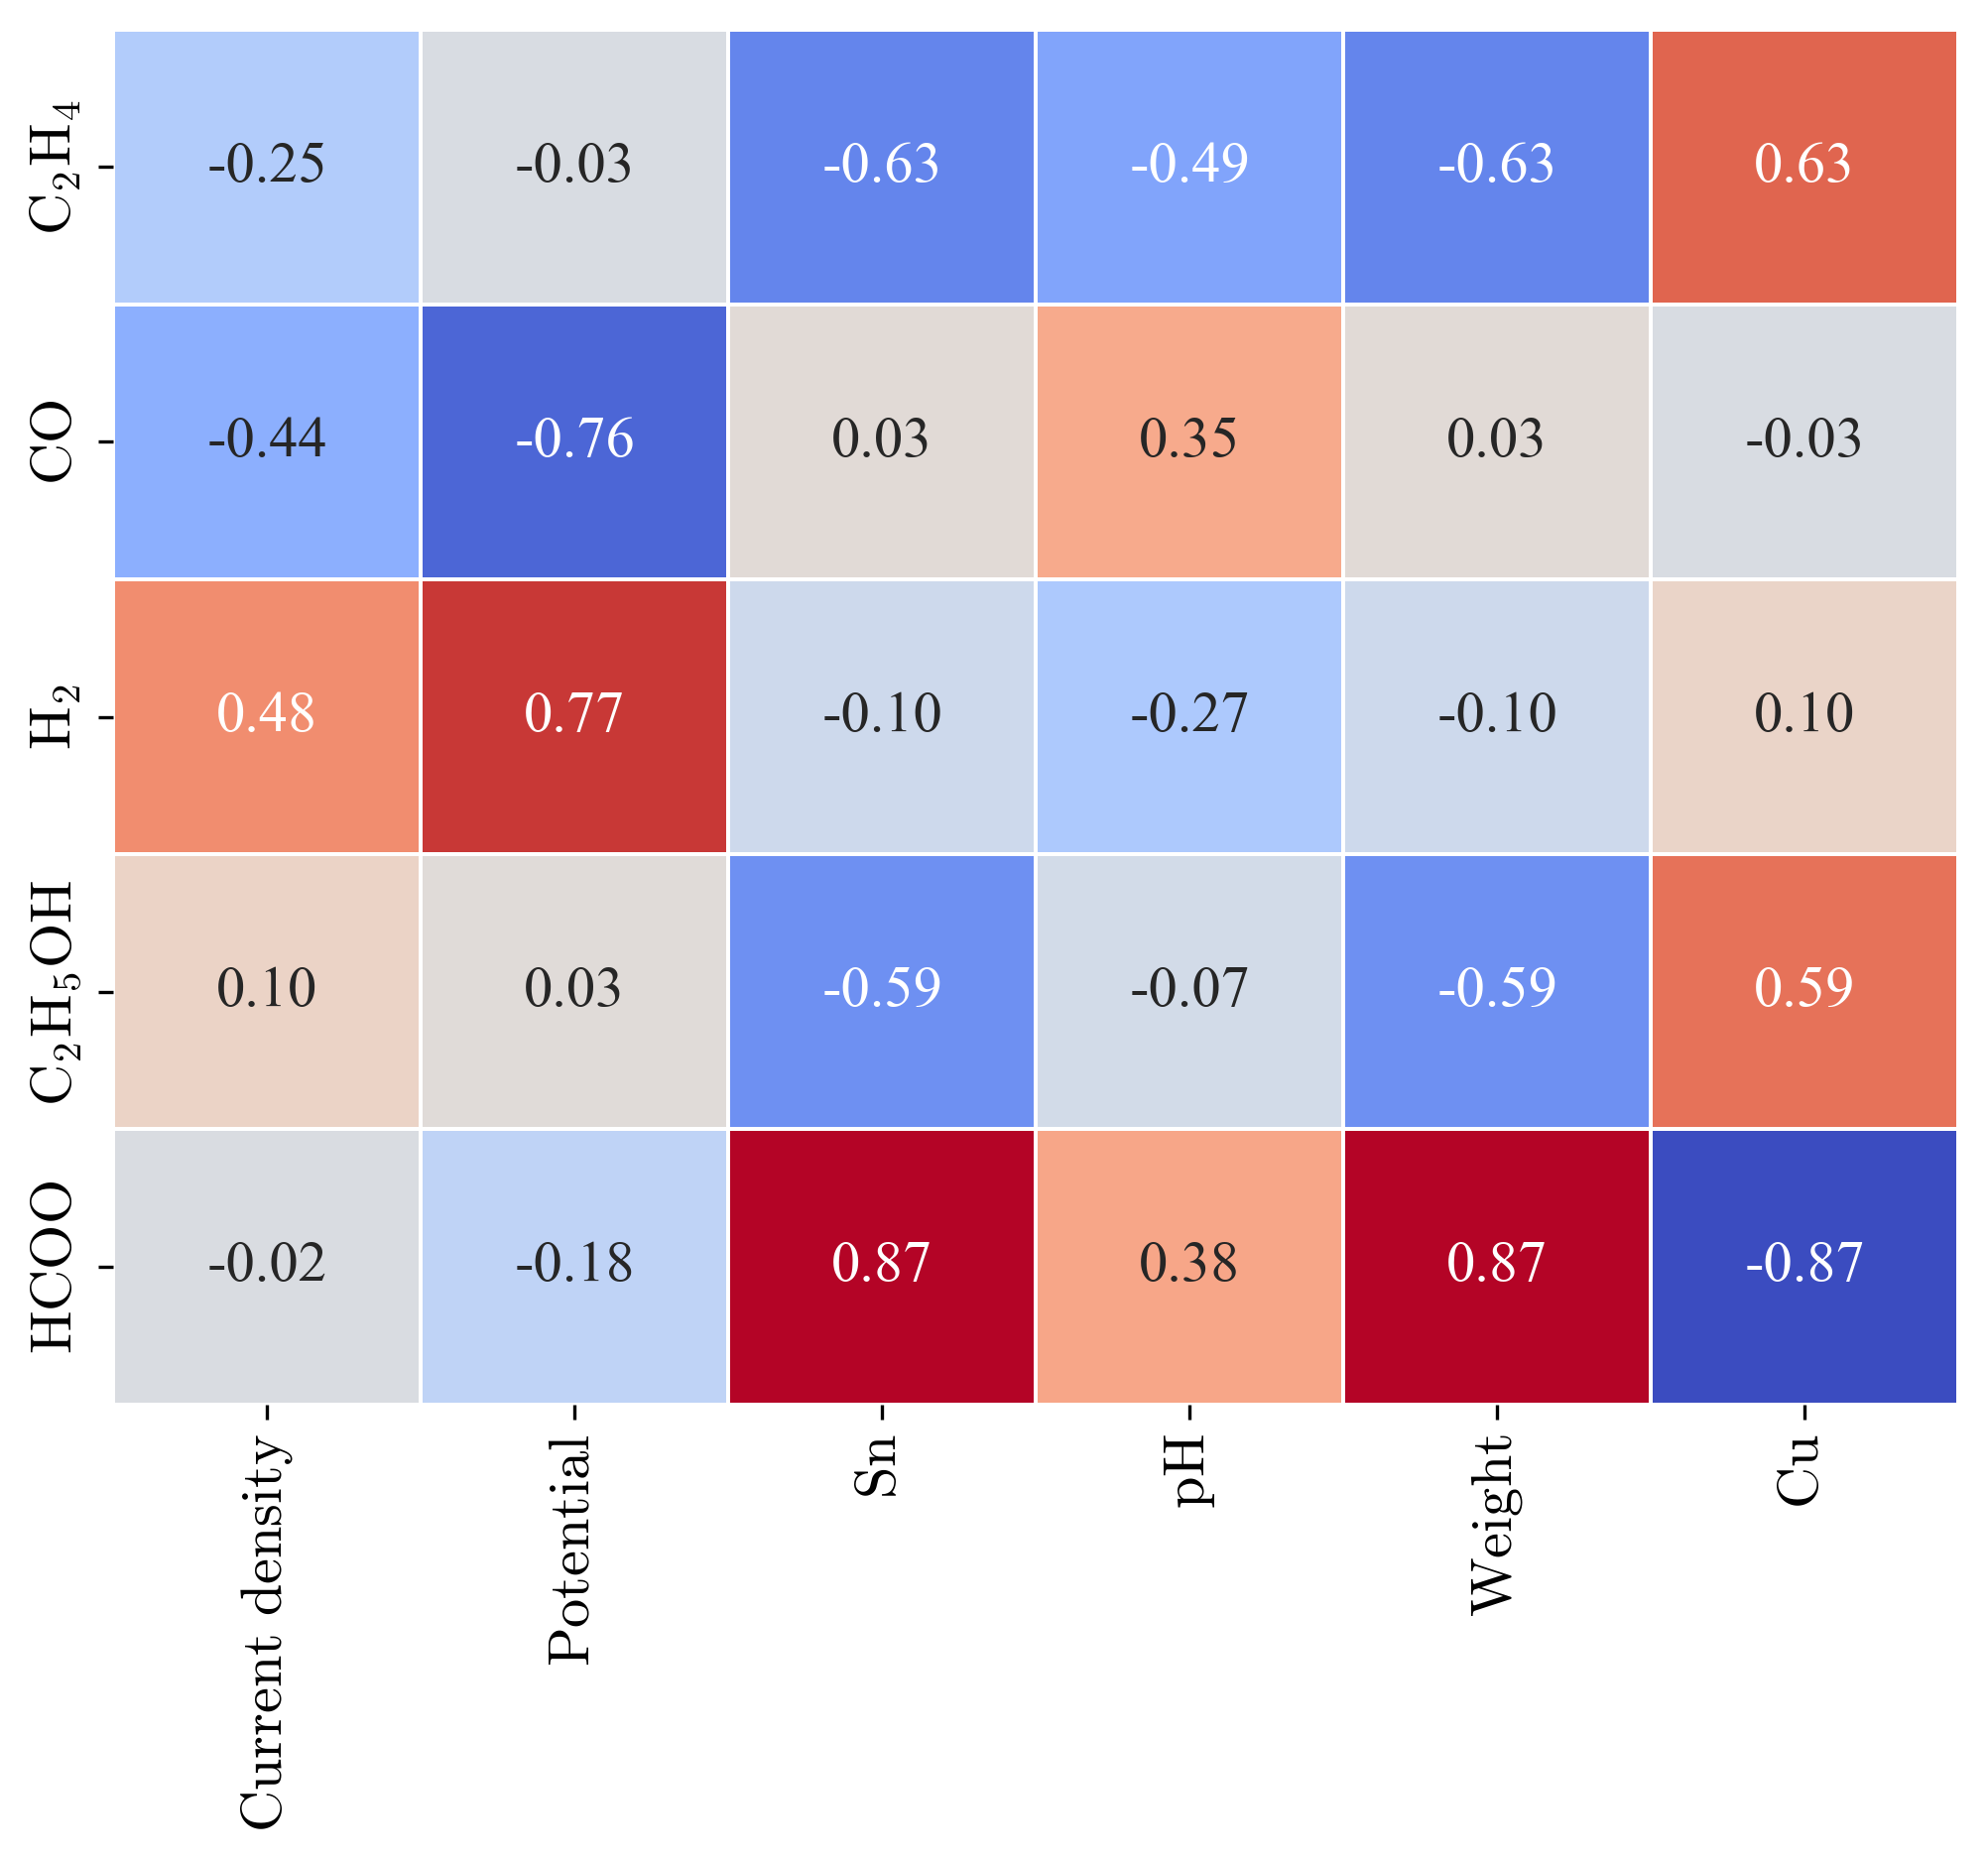

In [25]:
plot_heat_map(data = correlation_target, fig_size = (8, 6), mask=False, compute_corr=False, save_fig=False)